# Notebook to explore the ITI data used to train the FDL2018 neural networks

In [1]:
import numpy as np
from sunpy.map import Map, make_fitswcs_header
import glob
import os, sys
import numpy as np
import pandas as pd
import multiprocessing
import skimage
from sklearn.linear_model import SGDRegressor
import pdb
import argparse

# Add modile to patch
_S4PI_DIR = os.path.dirname(os.getcwd()).split('/')[:-1]
_S4PI_DIR = os.path.join('/',*_S4PI_DIR)
sys.path.append(_S4PI_DIR+'/4piuvsun/')
from s4pi.data.preprocessing import loadAIAMap

from make_train_val_test_sets import handleStd

## Path to data

In [2]:
# Path to data:
aia_path = '/mnt/miniset/aia'

# List of filenames, per wavelength
aia_filenames = [[f for f in glob.glob(aia_path+'/aia_lev1_%sa_*.fits' % (wl))] for
                wl in ['171', '193', '211', '304']]
    
# Load Pandas or CSV file

# Steps
aia_index = [aia_filenames[0][0], aia_filenames[1][0], aia_filenames[2][0], aia_filenames[3][0]]

## Read and calibrate

In [3]:
d = int(1024/256)
aia_data, aia_mean = handleStd(aia_index, divide=d, remove_off_limb=True)

(4, 1, 1024, 1024)
(4, 1024, 1024)
(4, 256, 256)


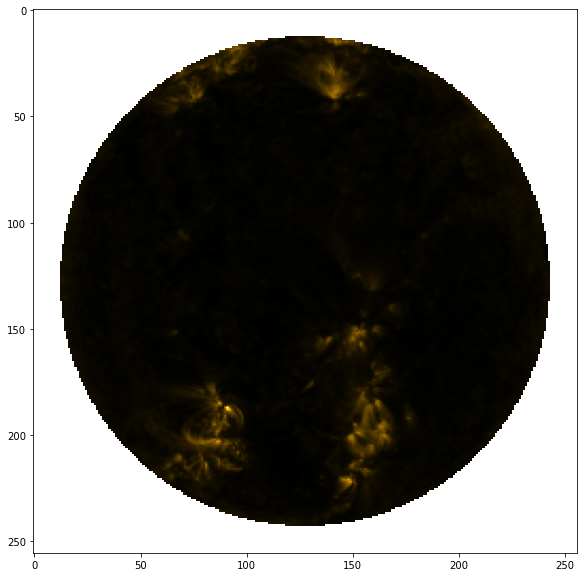

In [5]:
from sunpy.visualization.colormaps import cm
import matplotlib.pyplot as plt
from astropy.visualization import ImageNormalize, LinearStretch, AsinhStretch

# Figure
fig = plt.figure(figsize=(24, 10))

norm = ImageNormalize(vmin=0, vmax=100000, stretch=AsinhStretch(0.001), clip=True)
cmap = cm.sdoaia171

ax = plt.subplot()
im = plt.imshow(aia_data[0, :, :], axes=ax, cmap=cmap)

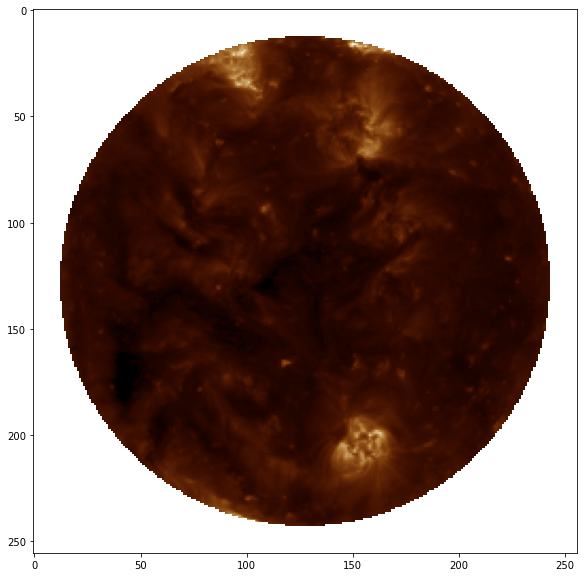

In [7]:
# Figure
fig = plt.figure(figsize=(24, 10))

norm = ImageNormalize(vmin=0, vmax=100000, stretch=AsinhStretch(0.001), clip=True)
cmap = cm.sdoaia193

ax = plt.subplot()
im = plt.imshow(aia_data[1, :, :], axes=ax, cmap=cmap)